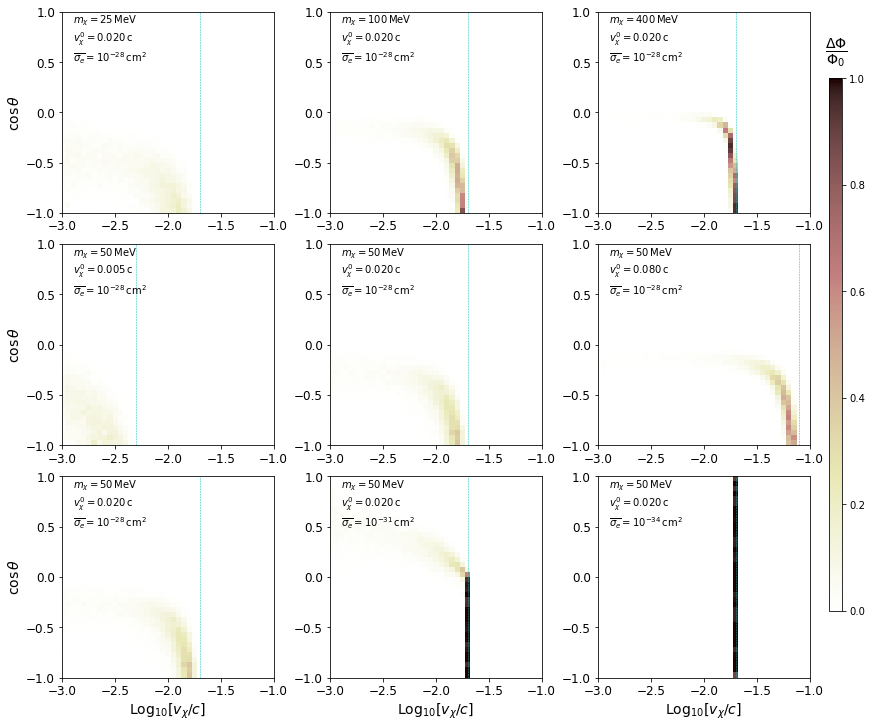

In [19]:
### F(q) = 1, logv ~ cos, N = 100000 ###
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

cbins = 41
vbins = 41
cbins_interv = 50
bin_ctheta = np.linspace(-1,1,cbins)
bin_velo = np.logspace(-3-0.02397,-1-0.02397,vbins)
phi_0 = 1e5/6371.**2/np.pi

fig, ax = plt.subplots(3,3,figsize=(12,10),constrained_layout=True)
ax = ax.flatten()

images = []
for i in np.arange(9):
    
    if i < 3:
        a = [2.5,1,4]
        b = [7,8,8]
        f0 = np.loadtxt('%se%s_1e-28_0.02_ctheta_velo_weight_disc.txt'%(a[i],b[i]))
        f1 = np.loadtxt('%se%s_1e-28_0.02_binarea_disc.txt'%(a[i],b[i]))
        #file[:,0] = np.where(file[:,0]>0, file[:,0]**2, -file[:,0]**2)
        _velo = f0[:,1]
        _ctheta = f0[:,0]
        _weight = f0[:,2]
        
        _area_list = f1[:,1]
        bin_area = np.array(_area_list).reshape(cbins-1,cbins_interv).sum(axis=1)
        h = np.histogram2d(_velo,_ctheta,weights = _weight,bins=[ bin_velo,bin_ctheta])
        im = ax[i].pcolormesh(np.log10(bin_velo),bin_ctheta,(h[0]/bin_area).T/phi_0,cmap='pink_r',vmax=1,rasterized=True)
    
        ax[i].vlines(np.log10(0.020),-1,1,linestyle='--',color='c',lw=0.5)
        ax[i].annotate(r'$m_{\chi}=%d\,\mathrm{MeV}$'%(a[i]*10 if i==0 else a[i]*100) +'\n'+ r'$v^{0}_{\chi}=0.020\,\mathrm{c}$'+'\n'+r'$\overline{\sigma_e}= 10^{-28}\,\mathrm{cm^2}$',
                       xy=(0.05,0.75),xycoords='axes fraction',size=10)    
        

    elif i < 6:
        
        d = [0.005, 0.02, 0.08]
        f0 = np.loadtxt('5e7_1e-28_%s_ctheta_velo_weight_disc.txt'%d[i-3])
        f1 = np.loadtxt('5e7_1e-28_%s_binarea_disc.txt'%d[i-3])
        #f1[:,0] = np.where(file[:,0]>0, file[:,0]**2, -file[:,0]**2)
            
        _velo = f0[:,1]
        _ctheta = f0[:,0]
        _weight = f0[:,2]
        
        _area_list = f1[:,1]
        bin_area = np.array(_area_list).reshape(cbins-1,cbins_interv).sum(axis=1)
        h = np.histogram2d(_velo,_ctheta,weights = _weight,bins=[ bin_velo,bin_ctheta])
        im = ax[i].pcolormesh(np.log10(bin_velo),bin_ctheta,(h[0]/bin_area).T/phi_0,cmap='pink_r',vmax=1,rasterized=True)
        
        ax[i].vlines(np.log10(d[i-6]),-1,1,linestyle='--',color='c',lw=0.5)
        ax[i].annotate(r'$m_{\chi}=50\,\mathrm{MeV}$'+'\n'+r'$v^{0}_{\chi}=%.3f\,\mathrm{c}$'%d[i-6]+'\n'+r'$\overline{\sigma_e}= 10^{-28}\,\mathrm{cm^2}$'
                    ,xy=(0.05,0.75),xycoords='axes fraction',size=10)
    else:
        
        c = [-28, -31, -34]
        f0 = np.loadtxt('5e7_1e%d_0.02_ctheta_velo_weight_disc.txt'%c[i-6])
        f1 = np.loadtxt('5e7_1e%d_0.02_binarea_disc.txt'%c[i-6])
        #file[:,0] = np.where(file[:,0]>0, file[:,0]**2, -file[:,0]**2)
            
        _velo = f0[:,1]
        _ctheta = f0[:,0]
        _weight = f0[:,2]
        
        _area_list = f1[:,1]
        bin_area = np.array(_area_list).reshape(cbins-1,cbins_interv).sum(axis=1)
        h = np.histogram2d(_velo,_ctheta,weights = _weight,bins=[ bin_velo,bin_ctheta])
        im = ax[i].pcolormesh(np.log10(bin_velo),bin_ctheta,(h[0]/bin_area).T/phi_0,cmap='pink_r',vmax=1,rasterized=True)
        
        ax[i].vlines(np.log10(0.020),-1,1,linestyle='--',color='c',lw=0.5)
        ax[i].annotate(r'$m_{\chi}=50\,\mathrm{MeV}$' +'\n'+r'$v^{0}_{\chi}=0.020\,\mathrm{c}$'+'\n'+r'$\overline{\sigma_e}= 10^{%d}\,\mathrm{cm^2}$'%c[i-6]
                   ,xy=(0.05,0.75),xycoords='axes fraction',size=10)
        
    #ax[i].set_xscale('log')    
    ax[i].tick_params(labelsize='large')
    ax[i].set_yticks([-1,-0.5,0,0.5,1])
    ax[i].set_xlim(-3,-1)    

    if i in [6,7,8]:
        ax[i].set_xlabel(r'${\rm Log}_{10}[v_{\chi}/c]$',fontsize=14)
    if i in [0,3,6]: 
        ax[i].set_ylabel(r'$\cos{\theta}$',fontsize=14) 

    #im.get_array()[:] /= 1e5/6371.**2
    images.append(im)
    

norm = colors.Normalize(vmin=0,vmax=1)
[im.set_norm(norm) for im in images]

cb = fig.colorbar(images[0], ax=[ax[i] for i in range(0,9)],shrink=0.8,aspect=40,pad=0.001)
cb.set_label(r'$\frac{\Delta{\Phi}}{{\Phi_{0}}}$',labelpad=-29,y=1.08,rotation=0,fontsize=20)

#plt.savefig('Vdistribution.pdf')
#plt.savefig('Vdistribution.jpg')
#plt.show()
